In [61]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import torch

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

import utils.torchUtils as gnn

plt.style.use('science')
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size'] =  15

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
tree = Tree(fc.passthrough.TESTING_MX_700_MY_400)

In [2]:
testing = gnn.Dataset('data/signal-testing',transform=gnn.to_uptri_graph)
len(testing)

5619

In [3]:
from torch_geometric.loader import DataLoader

testloader = DataLoader(testing,batch_size=50,num_workers=4)

In [4]:
model = gnn.GCN.load_from_checkpoint('models/graph_classifier/lightning_logs/version_6/checkpoints/epoch=19-step=16119.ckpt',dataset=testing)

In [5]:
node_metrics,edge_metrics = gnn.get_model_roc(model,testloader)

In [6]:
print(node_metrics.get_wps())
print(edge_metrics.get_wps())

[[0.1        0.85555595 0.58509696]
 [0.01       0.28775242 0.95724815]
 [0.001      0.26017674 0.96390003]]
[[0.1        0.76008602 0.65640175]
 [0.01       0.23045161 0.93582052]
 [0.001      0.03105376 0.97311902]]


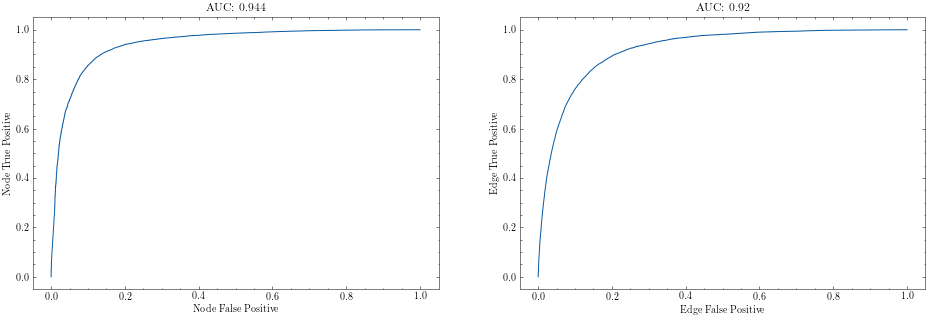

In [7]:
fig,ax = gnn.plot_auroc(node_metrics,edge_metrics)
study.save_fig(fig,'graphs','model-roc')

In [9]:
for line in np.concatenate([node_metrics.wps[:,:2],edge_metrics.wps[:,1:2]],axis=-1):
    print(' & '.join(line.round(3).astype(str))+'\\\\')

0.1 & 0.856 & 0.76\\
0.01 & 0.288 & 0.23\\
0.001 & 0.26 & 0.031\\


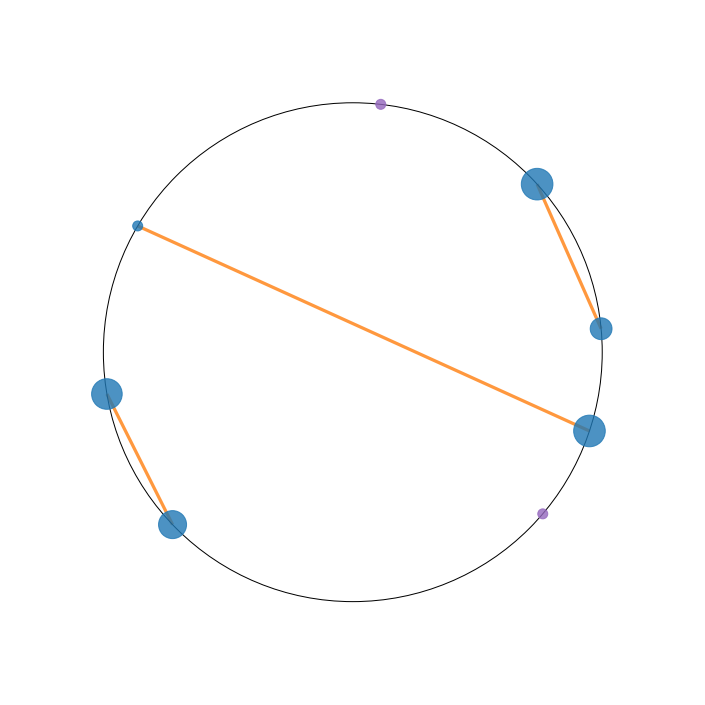

In [47]:
fig,ax = plt.subplots(figsize=(10,10))
g = testing[9]
gnn.display_graph(g,show_detector=True,figax=(fig,ax))
fig.tight_layout()
study.save_fig(fig,'graphs','mx700_my400_jets')


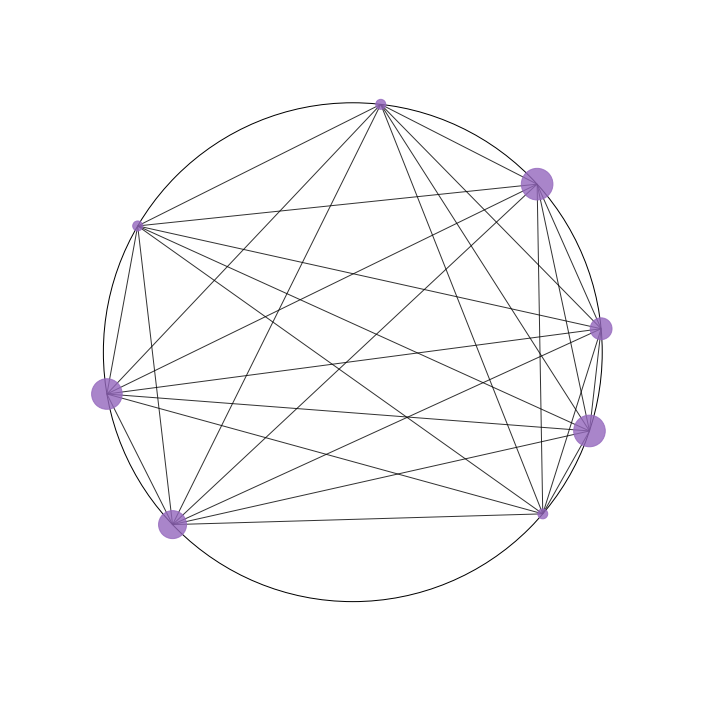

In [48]:
fig,ax = plt.subplots(figsize=(10,10))
gnn.display_graph(g,coloring=None,show_detector=True,figax=(fig,ax))
fig.tight_layout()
study.save_fig(fig,'graphs','mx700_my400_jets_full')


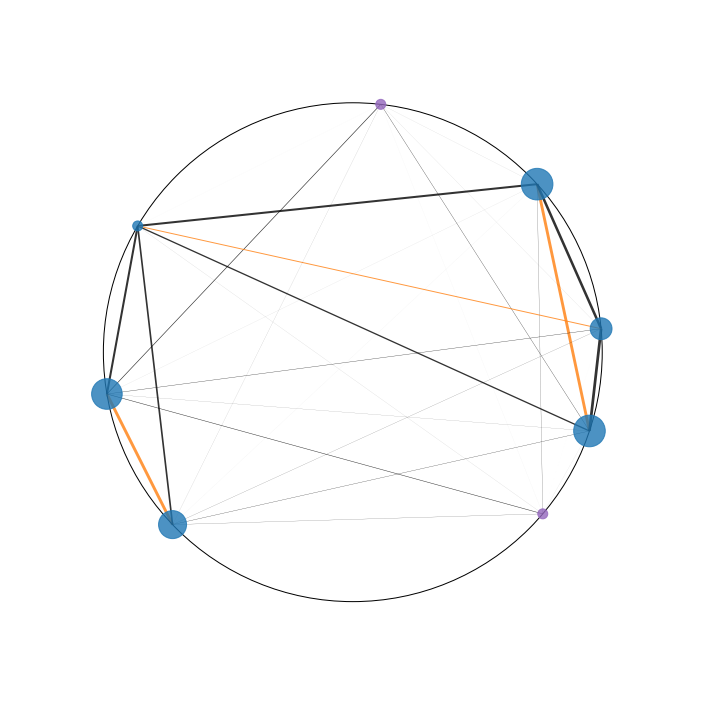

In [49]:
fig,ax = plt.subplots(figsize=(10,10))
g_pred = gnn.graph_pred(model,g)
gnn.display_graph(g_pred,show_detector=True,figax=(fig,ax))
fig.tight_layout()
study.save_fig(fig,'graphs','mx700_my400_jets_pred')


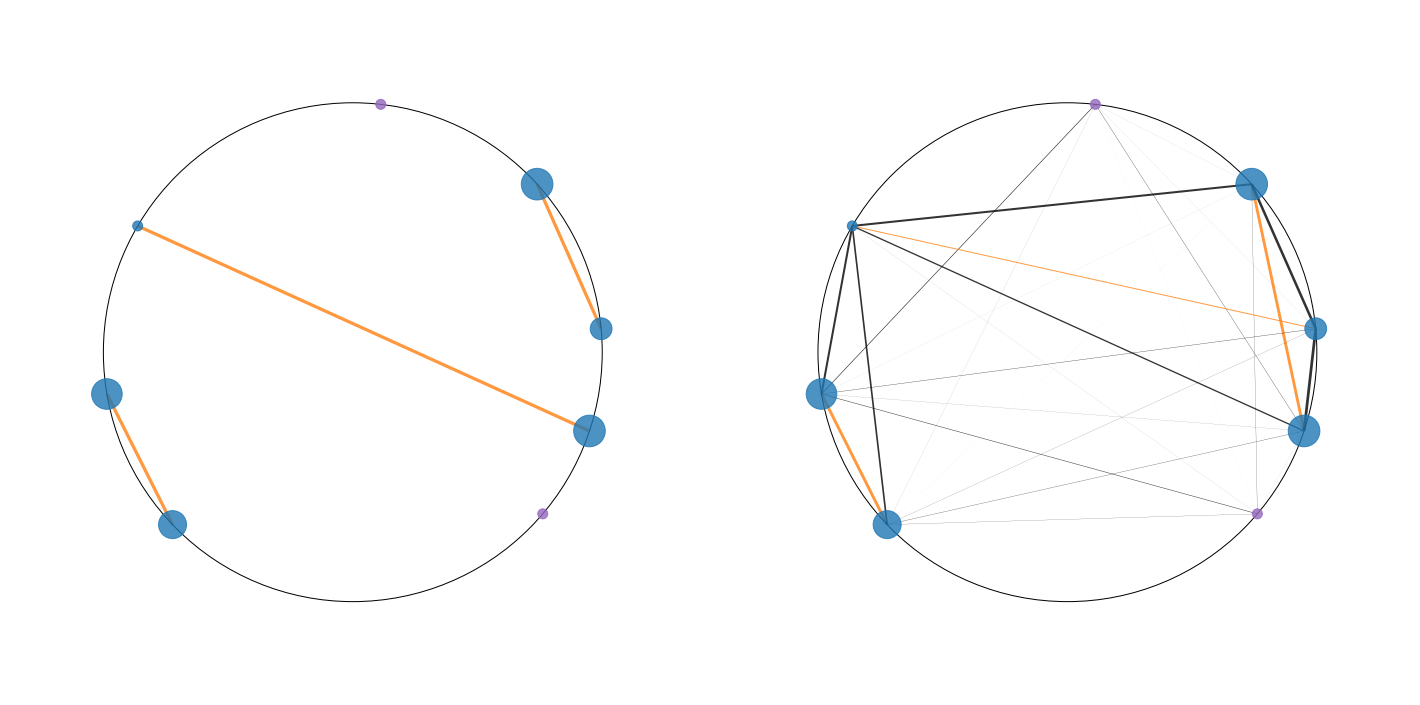

In [50]:
fig,ax = plt.subplots(ncols=2,figsize=(20,10))
g = testing[9]
g_pred = gnn.graph_pred(model,g)
gnn.display_graph(g,show_detector=True,figax=(fig,ax[0]))
gnn.display_graph(g_pred,show_detector=True,figax=(fig,ax[1]))
fig.tight_layout()